# Feature Exploration Toolkit

This is a demo notebook for FET - toolkit which tries to speedup repetitive exploration data analysis techniques. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/srv/data/uhricdan/data/demo.csv')
df['LABEL_MAIN'].unique()

array(['malicious', 'benign'], dtype=object)

For demonstration I use simple labeled dataset. FET doesn't need labels for values exploration - if you just want to explorer features distributions, you're fine without labels. Also you can provide more than two classes.

In [3]:
df_malicious = df[df['LABEL_MAIN'] == 'malicious'].sample(500)
df_benign = df[df['LABEL_MAIN'] == 'benign'].sample(500)
df_explore = pd.concat([df_malicious, df_benign])

Boxplotting, distribution evaluation using kernel density estimations, etc. may get compution heavy - I suggest to do quick visual analysis on smaller subset of dataset. Here I randomly sampled both classes.

In [4]:
from fet.explorer import Explorer

In [5]:
print(Explorer.__doc__)

Dataset explorer.

    Args:
        y (str, optional): Target/dependent variable. Defaults to None.
    


In [6]:
e = Explorer(y='LABEL_MAIN')

In [7]:
e.fit(df_explore)

We fit our dataframe for exploration using `fit` method - this method uses `fet.flow` module to calculate features. During fitting it also removes zero variance features.

## Visual analysis

FET utilizes seaborn for most graphing (and matplotlib to create plot grids). Below is a showreel of plotting functions. See all in the `fet.explorer` module.

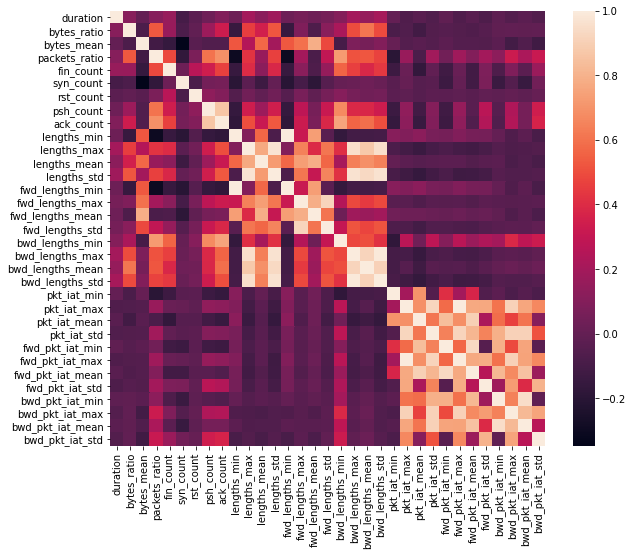

In [8]:
e.correlation_matrix()

All `*plot` functions take as first argument list of columns to include - if the list is not provided, all feature columns are included. All `*plot` functions also take `**kwargs` which are same as their original seaborn counterparts.

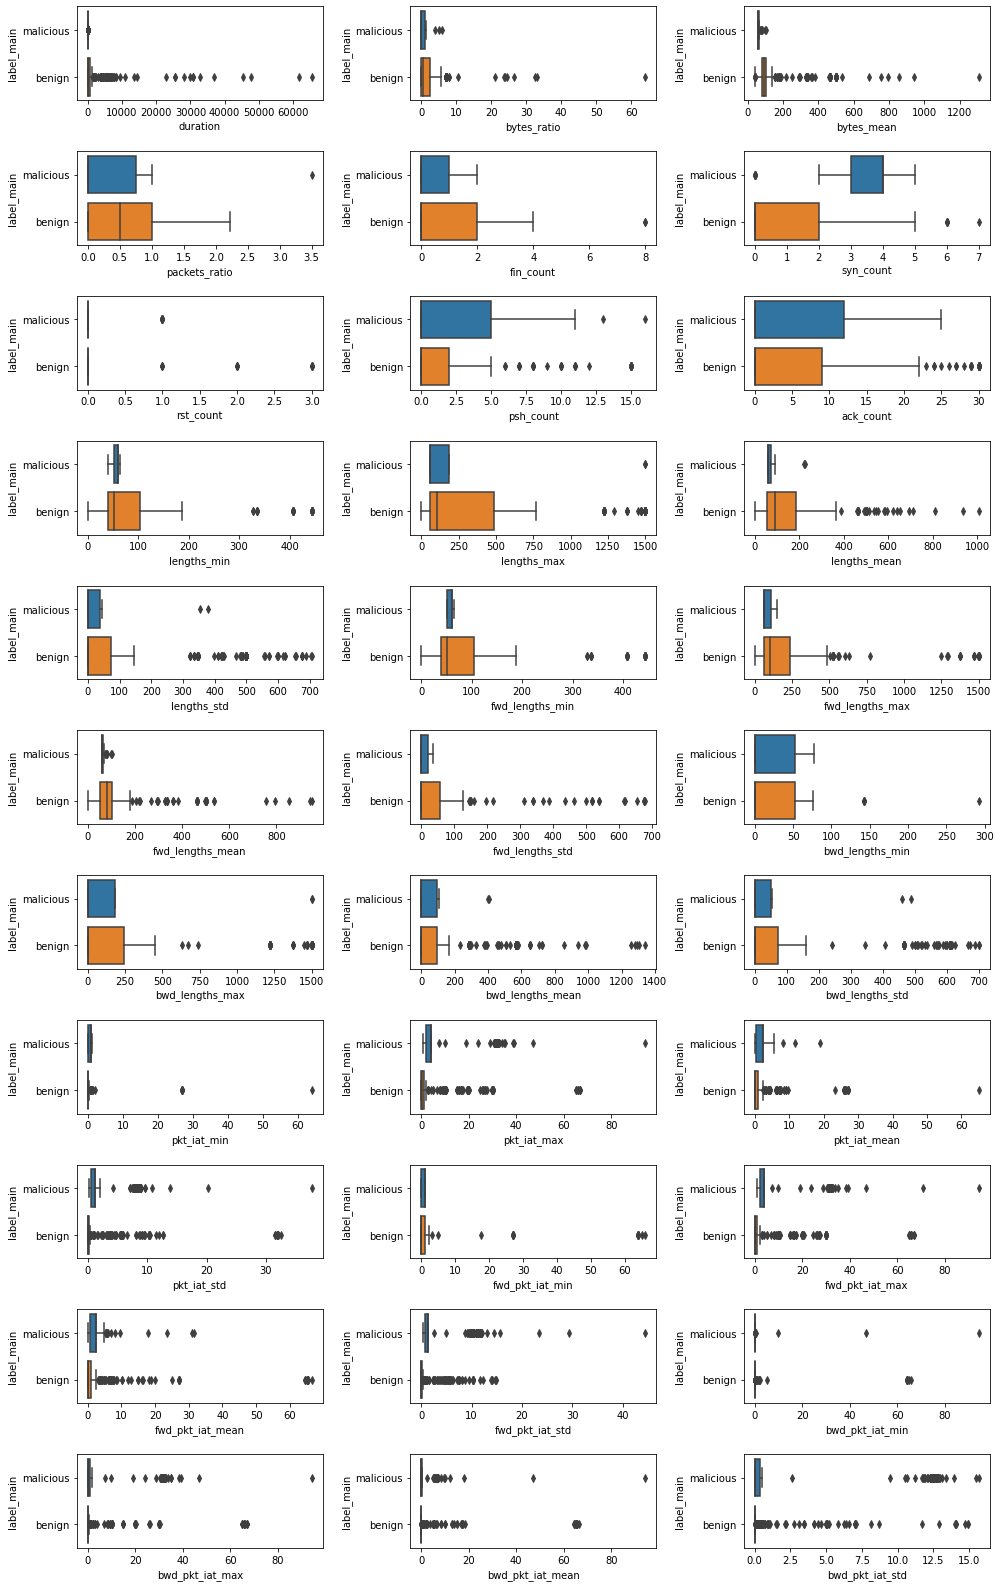

In [9]:
e.boxplot()

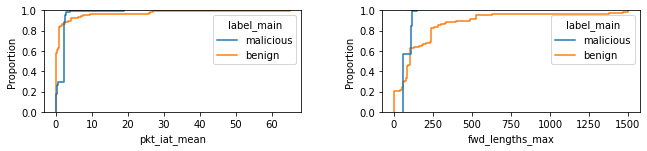

In [10]:
e.ecdfplot(['pkt_iat_mean', 'fwd_lengths_max'])

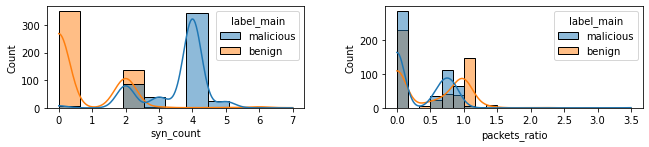

In [11]:
e.histplot(['syn_count', 'packets_ratio'], kde=True)

This call to `pairplot` uses `kbest` method which returns kbest features according to scoring function (see more on feature_scores below).

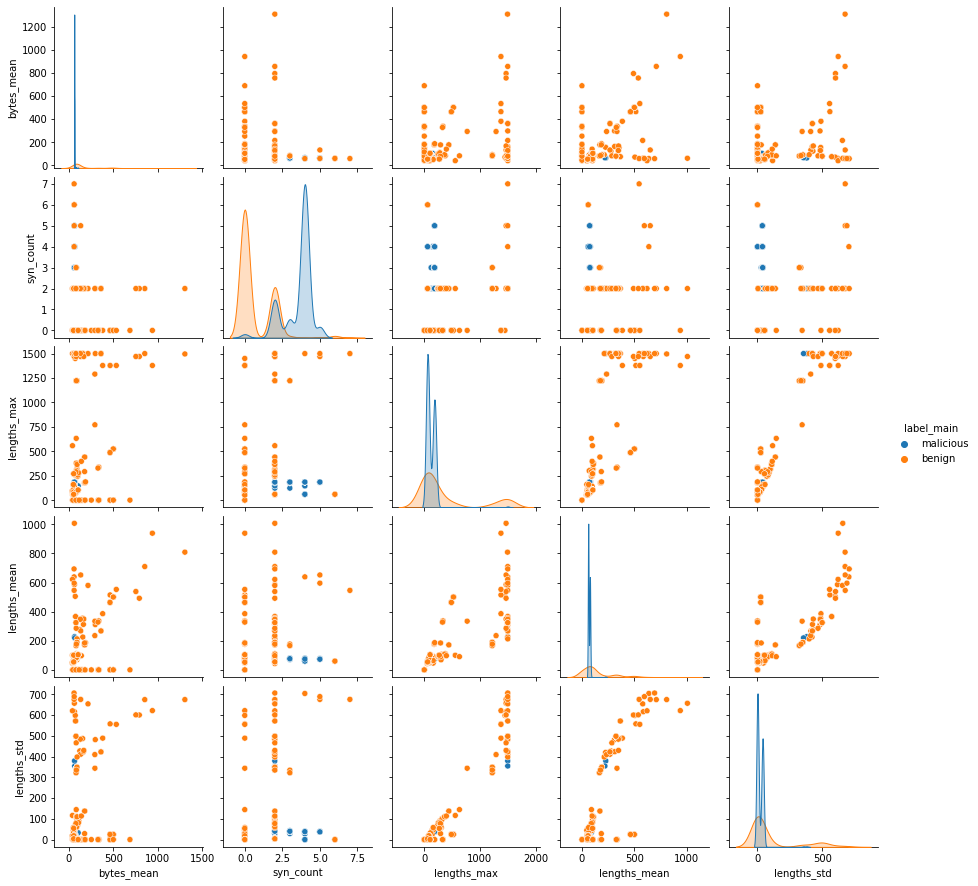

In [12]:
e.pairplot(e.kbest(5))

## Scores and models

To evaluate features using statistical techniques or models, two main methods are present:

- `feature_scores`
- `feature_importances`

### Feature scores

In [14]:
print(e.feature_scores.__doc__)

Evaluate feature scores using scoring function.

        Args:
            score_func ([callable], optional): Scoring function. Defaults
                to None - which uses f_classif.

        Raises:
            ValueError: Nothing to classify w/o target variable.

        Returns:
            list: Sorted list of tuples (feature, score).
        


In [17]:
e.feature_scores()

[('syn_count', 1903.445925469346),
 ('bytes_mean', 145.69304638565927),
 ('lengths_mean', 114.71666235849374),
 ('lengths_max', 113.43030276975422),
 ('lengths_std', 97.13966552159404),
 ('bwd_lengths_std', 83.30229202912442),
 ('bwd_lengths_max', 76.03097782033649),
 ('fwd_lengths_max', 71.21825249439412),
 ('fwd_lengths_mean', 58.52319110511868),
 ('bwd_lengths_mean', 56.853390337223246),
 ('bytes_ratio', 53.256501160407474),
 ('fwd_pkt_iat_std', 49.379119408443124),
 ('fwd_lengths_std', 47.12067531702835),
 ('duration', 37.93317516234716),
 ('packets_ratio', 34.53785001436848),
 ('bwd_pkt_iat_std', 31.38178699015015),
 ('lengths_min', 27.759478651835),
 ('fwd_lengths_min', 27.358208868007658),
 ('fin_count', 15.584798179479115),
 ('fwd_pkt_iat_max', 14.72042857416674),
 ('pkt_iat_max', 14.610451648903314),
 ('fwd_pkt_iat_min', 11.797793415347005),
 ('bwd_pkt_iat_max', 8.64988410138595),
 ('psh_count', 8.603301334699653),
 ('bwd_pkt_iat_min', 5.372476857475158),
 ('pkt_iat_std', 4.33

Default scoring function is `f_classif` which return f test results. You can provide any other scoring function from `sklearn.feature_selection`.

In [18]:
from sklearn.feature_selection import chi2

e.feature_scores(chi2)

[('duration', 882837.3862284871),
 ('lengths_max', 68047.42899957071),
 ('bwd_lengths_max', 61546.15347129995),
 ('lengths_std', 30142.782807204712),
 ('bwd_lengths_std', 29887.94225524541),
 ('fwd_lengths_max', 20573.777095450387),
 ('bwd_lengths_mean', 19592.638588325273),
 ('bytes_mean', 15436.385805229456),
 ('lengths_mean', 14256.862410980842),
 ('fwd_lengths_std', 10317.85140193279),
 ('fwd_lengths_mean', 6598.800233818243),
 ('lengths_min', 1955.06358611541),
 ('fwd_lengths_min', 1920.9971175198905),
 ('syn_count', 980.8320754716981),
 ('bytes_ratio', 480.35066214459727),
 ('fwd_pkt_iat_min', 426.0999469035684),
 ('fwd_pkt_iat_std', 342.5585633706554),
 ('bwd_pkt_iat_min', 334.39909557362),
 ('fwd_pkt_iat_max', 319.34369991464723),
 ('pkt_iat_max', 310.9138741594992),
 ('bwd_pkt_iat_std', 300.4510569203033),
 ('bwd_pkt_iat_max', 279.377718748358),
 ('bwd_pkt_iat_mean', 79.14923724713195),
 ('pkt_iat_std', 41.471124064649324),
 ('fwd_pkt_iat_mean', 41.00016334434915),
 ('psh_coun

### Feature importances

In [19]:
print(e.feature_importances.__doc__)

Evaluate feature importances using classifier.

        Args:
            clf (object, optional): Instantiated classifier. Defaults
                to None - which uses ExtraTreesClassifier.

        Raises:
            ValueError: Nothing to classify w/o target variable.

        Returns:
            list: Sorted list of tuples (feature, importance).
        


In [20]:
e.feature_importances()

[('syn_count', 0.2488367602656262),
 ('bytes_mean', 0.05617104696916991),
 ('lengths_mean', 0.04876829687422712),
 ('fwd_lengths_max', 0.04839527631415936),
 ('fwd_lengths_min', 0.0467955769994441),
 ('lengths_min', 0.046732346109943874),
 ('lengths_max', 0.04212891122149782),
 ('fwd_lengths_mean', 0.042091418720641406),
 ('fin_count', 0.03415356915193597),
 ('bwd_lengths_std', 0.034030747410317135),
 ('bwd_lengths_max', 0.03257343271855131),
 ('lengths_std', 0.03155244228365911),
 ('bwd_lengths_mean', 0.026760062689249065),
 ('ack_count', 0.026359014484606074),
 ('pkt_iat_max', 0.022092943187055934),
 ('fwd_pkt_iat_std', 0.0215089274844134),
 ('pkt_iat_min', 0.020168981859639237),
 ('fwd_pkt_iat_max', 0.020032624436959693),
 ('packets_ratio', 0.01971588068878467),
 ('fwd_lengths_std', 0.01782998095893631),
 ('fwd_pkt_iat_mean', 0.01745248594033643),
 ('pkt_iat_mean', 0.01664999452418874),
 ('pkt_iat_std', 0.013219209647094159),
 ('psh_count', 0.012135761509257506),
 ('bytes_ratio', 0.

Default model to evaluate feature importances is `ExtraTreesClassifier`. Any model with available `feature_importances_` property may be used.

In [21]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()

e.feature_importances(clf)

[('syn_count', 0.2),
 ('fwd_lengths_max', 0.1),
 ('fwd_pkt_iat_min', 0.08),
 ('bytes_mean', 0.06),
 ('pkt_iat_min', 0.06),
 ('fwd_pkt_iat_std', 0.06),
 ('duration', 0.04),
 ('fin_count', 0.04),
 ('lengths_max', 0.04),
 ('fwd_lengths_min', 0.04),
 ('fwd_lengths_mean', 0.04),
 ('bwd_lengths_max', 0.04),
 ('pkt_iat_mean', 0.04),
 ('bwd_pkt_iat_min', 0.04),
 ('bwd_pkt_iat_max', 0.04),
 ('bytes_ratio', 0.02),
 ('psh_count', 0.02),
 ('lengths_mean', 0.02),
 ('bwd_lengths_std', 0.02),
 ('packets_ratio', 0.0),
 ('rst_count', 0.0),
 ('ack_count', 0.0),
 ('lengths_min', 0.0),
 ('lengths_std', 0.0),
 ('fwd_lengths_std', 0.0),
 ('bwd_lengths_min', 0.0),
 ('bwd_lengths_mean', 0.0),
 ('pkt_iat_max', 0.0),
 ('pkt_iat_std', 0.0),
 ('fwd_pkt_iat_max', 0.0),
 ('fwd_pkt_iat_mean', 0.0),
 ('bwd_pkt_iat_mean', 0.0),
 ('bwd_pkt_iat_std', 0.0)]

## Transforming full dataset

After you're done with some initial analysis using explorer, you may want to use directly `fet.flow` module to calculate features on whole dataset.

In [22]:
from fet.flow import extract_per_flow_stats

In [23]:
extract_per_flow_stats(df)

,dst_ip,src_ip,bytes,bytes_rev,link_bit_field,time_first,time_last,dst_mac,src_mac,packets,...,pkt_iat_mean,pkt_iat_std,fwd_pkt_iat_min,fwd_pkt_iat_max,fwd_pkt_iat_mean,fwd_pkt_iat_std,bwd_pkt_iat_min,bwd_pkt_iat_max,bwd_pkt_iat_mean,bwd_pkt_iat_std
0,185.244.25.235,192.168.1.195,996,4080,1,2018-12-21 14:55:32.353979,2018-12-21 14:55:40.541591,78:8a:20:43:93:d5,b8:27:eb:58:91:d2,16,...,0.327504,0.887983,0.000250,4.079931,0.545841,1.093245,0.000007,0.611641,0.101248,0.184195
1,192.168.1.195,185.244.25.235,243,129,1,2018-12-21 14:58:46.395810,2018-12-21 14:58:54.751811,b8:27:eb:58:91:d2,78:8a:20:43:93:d5,3,...,2.089000,3.571702,0.030981,8.275296,4.153139,4.122158,8.355251,8.355251,8.355251,0.000000
2,185.244.25.235,192.168.1.195,447,563,1,2018-12-21 15:00:09.843814,2018-12-21 15:00:10.971912,78:8a:20:43:93:d5,b8:27:eb:58:91:d2,7,...,0.094008,0.249445,0.000500,0.917962,0.188016,0.327236,0.000006,0.978445,0.204785,0.386972
3,185.244.25.235,192.168.1.195,240,0,1,2018-12-21 15:00:10.924437,2018-12-21 15:00:18.101866,78:8a:20:43:93:d5,b8:27:eb:58:91:d2,4,...,2.392476,1.269634,1.017423,4.079941,2.392476,1.269634,0.000000,0.000000,0.000000,0.000000
4,185.244.25.235,192.168.1.195,567,563,1,2018-12-21 15:00:20.926493,2018-12-21 15:00:25.021911,78:8a:20:43:93:d5,b8:27:eb:58:91:d2,9,...,0.292530,0.592791,0.000500,2.080065,0.511927,0.709136,0.000006,0.897739,0.187445,0.355255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,255.255.255.255,0.0.0.0,2016,0,1,2016-09-22 21:11:20.130000,2016-09-22 21:11:37.182000,ff:ff:ff:ff:ff:ff,70:ee:50:03:b8:ac,6,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7996,192.168.1.166,212.83.131.101,3120,3120,1,2016-09-22 17:02:15.695000,2016-09-22 17:07:24.599000,00:24:e4:11:18:a8,14:cc:20:51:33:ea,60,...,2.491034,4.232513,0.060000,10.260000,5.160000,5.042430,0.153000,10.168000,5.160000,4.950573
7997,8.8.8.8,192.168.1.240,420,0,1,2016-09-23 12:15:59.110000,2016-09-23 12:15:59.132000,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,5,...,0.005500,0.002062,0.004000,0.009000,0.005500,0.002062,0.000000,0.000000,0.000000,0.000000
7998,192.168.1.223,192.168.1.193,555,3989,1,2016-09-22 15:24:01.986000,2016-09-22 20:07:41.507000,ec:1a:59:79:f4:89,ec:1a:59:83:28:11,7,...,0.004538,0.005063,0.001000,0.020000,0.009667,0.006289,0.000000,0.028000,0.009500,0.009895
